In [35]:
import hddm
import matplotlib.pyplot as plt

In [54]:
data = hddm.load_csv('cavanagh_theta_nn.csv')

model = hddm.models.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))")
model.sample(500,burn=20, dbname='mymod.db', db='pickle')

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
 [-----------------100%-----------------] 500 of 500 complete in 194.6 sec

In [55]:
model.save('tst')
model = hddm.load('tst')

In [56]:
# model = hddm.HDDM(data, bias=True)  # a very simple model...
# model.sample(100, burn=20, dbname='traces.db', db='pickle')
# model.save('mymodel')
# model = hddm.load('mymodel')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0.5,1,'All groups: Group mean posteriors of within-subject drift-rate effects.')

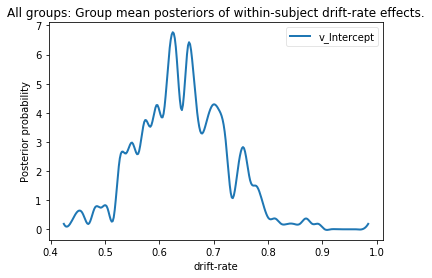

In [57]:
v_LL, v_WL, v_WW = model.nodes_db.ix[['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_LL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('All groups: Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')